In [1]:
# Importing and cleaning dataset 

import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mlt

from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score 

In [2]:
Diabetes = pd.read_csv('Data/diabetes.csv')
Diabetes = Diabetes.dropna(thresh=9)
Diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
Diabetes.shape

(768, 9)

In [5]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


There are no null values, hence data is clean !! 

In [6]:
# split data and label
M_Diabetes = Diabetes 
Outcome  = M_Diabetes['Outcome']
M_Diabetes.drop('Outcome', axis=1, inplace = True)

In [7]:
# Splitting data into positive and negative examples
Diabetes = pd.read_csv('Data/diabetes.csv')
Positives  = Diabetes[Diabetes['Outcome'] == 1]
Negatives = Diabetes[Diabetes['Outcome'] == 0]

## Exploratory Data Analysis 

In [8]:
Diabetes.sample(frac =0.1).head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
45,0,180,66,39,0,42.0,1.893,25,1
194,8,85,55,20,0,24.4,0.136,42,0
420,1,119,88,41,170,45.3,0.507,26,0
226,0,101,76,0,0,35.7,0.198,26,0
89,1,107,68,19,0,26.5,0.165,24,0


In [9]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# min value of all features are 0.00, which does not corelate to fact of well living being.
# Plotting distributions of features.

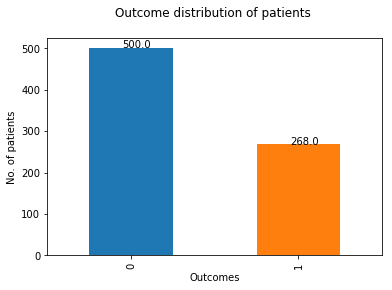

In [11]:
# Visualize number of different classes 
ax = plt.rc("font", size = 10)
ax = Diabetes['Outcome'].value_counts().plot(kind='bar')
ax.set_title("Outcome distribution of patients \n")
ax.set_xlabel('Outcomes')
ax.set_ylabel('No. of patients')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.2,p.get_height()+0.2))
plt.savefig('Plots/pstients_distribution.png', bbox_inches = 'tight')    
plt.show()

In [12]:
# so, we have 500 person with diabetes and 268 without diabetes. This is an inbalanced dataset.
# Hence, Accuracy is not a useful metric for machine learning algorithms. 

In [17]:
print(Diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [13]:
# For curve fittng 
from scipy import stats 
% matplotlib inline 

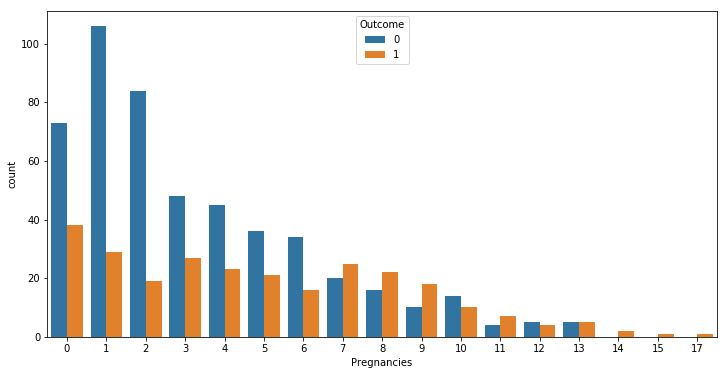

In [21]:
# pregnancy
plt.subplots(figsize = (12, 6))
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = Diabetes)
plt.savefig("Plots/pregnancies_distribution.png")
plt.show()

In [1]:
# From above graph we can say, blood pressure is highly correlated with getting diabetes 

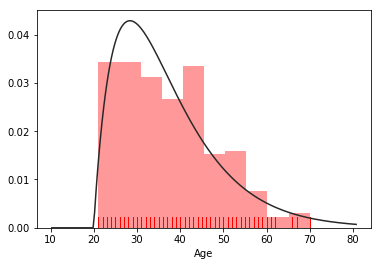

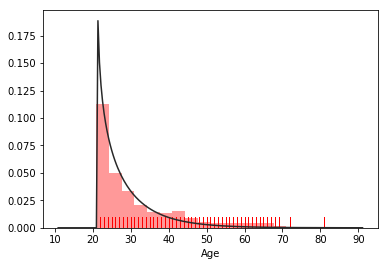

In [15]:
#Density of Age 
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
sns.distplot(Positives['Age'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax1)
sns.distplot(Negatives['Age'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax2)

In [16]:
# Age shows a great correlation with chances of diabetes 

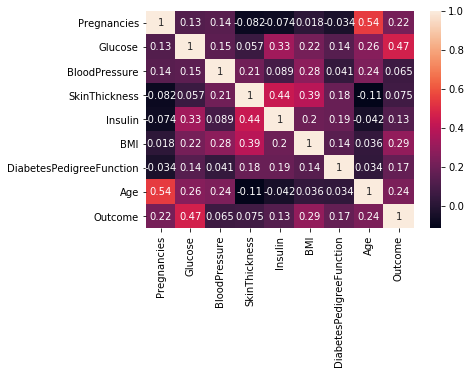

In [17]:
# Correlation between variables 
Corr = Diabetes[Diabetes.columns].corr()
sns.heatmap(Corr, annot=True)
plt.savefig('Plots/correlation_between_variables.png', bbinches = 'tight')

## Predictive modelling 

In [18]:
Diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
# Importing required libraries for machine learning algorithms 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn import tree

In [20]:
# Naive Bayes Algorithm 
gNB = GaussianNB()
scores = cross_val_score(gNB, M_Diabetes, Outcome, cv=5)
print("Accuracy : ", scores.mean())

Accuracy :  0.751336898396


In [21]:
# K Nearest Neighbors Algorithm 
scores = []

for i in range(1,31):
    neighbor = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(neighbor, M_Diabetes, Outcome, cv=5).mean())
    
max_a=0
k_max = 0

for i in range(0, 30):
    if(scores[i] >= max_a):
        max_a = scores[i]
        if(i>k_max):
            k_max=i
            
print("K is maximum in Knn for ", k_max, " with a accuracy of ", max_a)            

K is maximum in Knn for  13  with a accuracy of  0.757855869621


In [22]:
# Support Vector Machine

In [23]:
# Linear Kernel 
clf = svm.SVC(kernel = 'linear')
print("Accuracy : ", cross_val_score(clf, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.765682030388


In [24]:
# RBF Kernel 
clf_r = svm.SVC(kernel = 'rbf')
print("Accuracy : ", cross_val_score(clf, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.765682030388


In [25]:
# Decision Tree 
from sklearn import tree
cl = tree.DecisionTreeClassifier()
print("Accuracy : ", cross_val_score(cl, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.707155589509


In [26]:
# Random Forest 
Rf = RandomForestClassifier()
print("Accuracy : ", cross_val_score(Rf, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.733087174264


In [27]:
# Artificial Neural Network 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [28]:
Numpy_Matrix = M_Diabetes.as_matrix()
Numpy_Outcome = Outcome.as_matrix()

In [29]:
print(Numpy_Matrix.shape)
print(Numpy_Outcome.shape)

(768, 8)
(768,)


In [30]:
Numpy_Matrix

array([[   6.   ,  148.   ,   72.   , ...,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   66.   , ...,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   64.   , ...,   23.3  ,    0.672,   32.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ],
       [   1.   ,  126.   ,   60.   , ...,   30.1  ,    0.349,   47.   ],
       [   1.   ,   93.   ,   70.   , ...,   30.4  ,    0.315,   23.   ]])

In [31]:
K_fold = StratifiedKFold(n_splits=4, shuffle = True)
cv_scores = []

for train, test in K_fold.split(Numpy_Matrix, Numpy_Outcome):
    
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_dim = 8))
    model.add(Dense(12, activation = 'relu', input_dim = 8))
    model.add(Dense(12, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics =['accuracy'])
    model.fit(Numpy_Matrix[train], Numpy_Outcome[train],batch_size = 32)
    
    scores = model.evaluate(Numpy_Matrix[test], Numpy_Outcome[test])
    cv_scores.append(scores[1]*100)

Epoch 1/10
576/576 [==============================] - 0s - loss: 0.6504 - acc: 0.3490     
Epoch 2/10
576/576 [==============================] - 0s - loss: 0.6411 - acc: 0.3490     
Epoch 3/10
576/576 [==============================] - 0s - loss: 0.4361 - acc: 0.4983     
Epoch 4/10
576/576 [==============================] - 0s - loss: 0.3481 - acc: 0.6510     
Epoch 5/10
576/576 [==============================] - 0s - loss: 0.3486 - acc: 0.6510     
Epoch 6/10
576/576 [==============================] - 0s - loss: 0.3483 - acc: 0.6510     
Epoch 7/10
576/576 [==============================] - 0s - loss: 0.3450 - acc: 0.6510     
Epoch 8/10
576/576 [==============================] - 0s - loss: 0.3415 - acc: 0.6528     
Epoch 9/10
576/576 [==============================] - 0s - loss: 0.3387 - acc: 0.6580     
Epoch 10/10
576/576 [==============================] - 0s - loss: 0.3490 - acc: 0.6510     
Epoch 2/10
576/576 [==============================] - 0s - loss: 0.3490 - acc: 0.6510    

In [32]:
def Mean(Scores):
    Sum =0 
    for i in Scores:
        Sum+=i 
        
    return(Sum/len(Scores))

In [33]:
print(Mean(cv_scores))

64.5833333333


In [34]:
# Learning algorithm with best accuracy is linear SVM 

In [35]:
# Eliminating irrelevant features using correlation matrix 
Corr.mean()

Pregnancies                 0.207326
Glucose                     0.306582
BloodPressure               0.246427
SkinThickness               0.239677
Insulin                     0.250539
BMI                         0.286731
DiabetesPedigreeFunction    0.206903
Age                         0.244379
Outcome                     0.295971
dtype: float64

In [36]:
Data_P = Diabetes 
Data_P.drop('Pregnancies', axis = 1, inplace = True)
Data_P.drop('Outcome', axis = 1, inplace = True)
clf = svm.SVC(kernel = 'linear')
print("Accuracy : ", cross_val_score(clf, Data_P, Outcome, cv=5).mean())

Accuracy :  0.776097105509


In [37]:
# it is founded that eliminating pregnancies feature resulted in a better accuracy. However,
# feature Diabetes Pedigree Function and both DPF and pregnancies resulted in same accuracy.

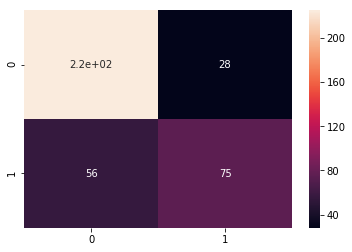

In [38]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(Data_P, Outcome, test_size = 0.5, random_state = 0)
clf.fit(x_train, y_train)
Confusion = confusion_matrix(y_test, clf.predict(x_test))
sns.heatmap(Confusion, annot = True,)

In [39]:
print(classification_report(y_test, clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.80      0.89      0.84       253
          1       0.73      0.57      0.64       131

avg / total       0.78      0.78      0.77       384

